# 01. Molecular data exploration (NCBI + Bloom)

This notebook performs initial exploration and consistency checks of the molecular data used in Module 1:
- SARS-CoV-2 genomes and metadata (Delta and Omicron) obtained from NCBI Virus.
- Spike phenotypes at clade and mutation level obtained from the Bloom lab submodule (`SARS2-spike-predictor-phenos`).

In [2]:
# Imports

import pandas as pd
from pathlib import Path

# Paths (adjust if the notebook is not at the project root)
BASE = Path("..")
DATA = BASE / "data"
EXTERNAL = BASE / "external" / "SARS2-spike-predictor-phenos" / "results"

## 1. Load NCBI molecular datasets (Delta & Omicron)

We load the cleaned metadata for Delta and Omicron and run basic checks:
- number of genomes
- column types and missing values
- distribution over collection dates and geographic locations.


In [3]:
# Load metadata
b1 = pd.read_csv(DATA / "b1" / "b1_meta_clean.csv")
ba2 = pd.read_csv(DATA / "ba2" / "ba2_meta_clean.csv")
beta = pd.read_csv(DATA / "beta" / "beta_meta_clean.csv")
delta = pd.read_csv(DATA / "delta" / "delta_meta_clean.csv")
omicron = pd.read_csv(DATA / "omicron" / "omicron_meta_clean.csv")
omicron_ba1 = pd.read_csv(DATA / "omicron_ba1" / "omicron_meta_clean.csv")
xbb15 = pd.read_csv(DATA / "xbb15" / "xbb15_meta_clean.csv")

print("B.1 shape:", b1.shape)
print("BA.2 shape:", ba2.shape)
print("Beta shape:", beta.shape)
print("Delta shape:", delta.shape)
print("Omicron shape:", omicron.shape)
print("Omicron BA.1 shape:", omicron_ba1.shape)
print("XBB.1.5 shape:", xbb15.shape)

B.1 shape: (23134, 4)
BA.2 shape: (61731, 4)
Beta shape: (1357, 4)
Delta shape: (29677, 4)
Omicron shape: (118530, 4)
Omicron BA.1 shape: (27778, 4)
XBB.1.5 shape: (9179, 4)


In [4]:
# Basic info

print("\n=== B.1 info ===")
b1.info()
print("\n=== BA.2 info ===")
ba2.info()
print("\n=== Beta info ===")
beta.info()
print("=== Delta info ===")
delta.info()
print("\n=== Omicron info ===")
omicron.info()
print("\n=== Omicron BA.1 info ===")
omicron_ba1.info()
print("\n=== XBB.1.5 info ===")
xbb15.info()



=== B.1 info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   accession                23134 non-null  object
 1   virus_name               23134 non-null  object
 2   geographic_location      23134 non-null  object
 3   isolate_collection_date  23134 non-null  object
dtypes: object(4)
memory usage: 723.1+ KB

=== BA.2 info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61731 entries, 0 to 61730
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   accession                61731 non-null  object
 1   virus_name               61731 non-null  object
 2   geographic_location      61731 non-null  object
 3   isolate_collection_date  61731 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB

=== Beta info ===
<class 'pa

### 1.1. Convert collection dates and inspect ranges


In [5]:
# Convert dates to datetime
for df in (b1, ba2, beta, delta, omicron, omicron_ba1, xbb15):
    df["isolate_collection_date"] = pd.to_datetime(
        df["isolate_collection_date"], errors="coerce"
    )

print("\nDate ranges:")
print("B.1 date range:",
      b1["isolate_collection_date"].min(),
      "→",
      b1["isolate_collection_date"].max())

print("BA.2 date range:",
      ba2["isolate_collection_date"].min(),
      "→",  
      ba2["isolate_collection_date"].max())

print("Beta date range:",
      beta["isolate_collection_date"].min(),
      "→",
      beta["isolate_collection_date"].max())

print("Delta date range:",
      delta["isolate_collection_date"].min(),
      "→",
      delta["isolate_collection_date"].max())

print("Omicron date range:",
      omicron["isolate_collection_date"].min(),
      "→",
      omicron["isolate_collection_date"].max())

print("Omicron BA.1 date range:",
      omicron_ba1["isolate_collection_date"].min(),
      "→",
      omicron_ba1["isolate_collection_date"].max())

print("XBB.1.5 date range:",
      xbb15["isolate_collection_date"].min(),
      "→",
      xbb15["isolate_collection_date"].max())


Date ranges:
B.1 date range: 2020-01-28 00:00:00 → 2022-08-02 00:00:00
BA.2 date range: 2020-09-02 00:00:00 → 2023-12-04 00:00:00
Beta date range: 2020-10-09 00:00:00 → 2023-06-07 00:00:00
Delta date range: 2020-07-07 00:00:00 → 2025-03-28 00:00:00
Omicron date range: 2020-09-15 00:00:00 → 2023-10-18 00:00:00
Omicron BA.1 date range: 2020-09-22 00:00:00 → 2023-04-20 00:00:00
XBB.1.5 date range: 2022-10-30 00:00:00 → 2024-05-28 00:00:00


### 1.2. Geographic distribution

We inspect the most represented countries / regions to ensure geographic diversity.

In [6]:
print("\nTop 10 locations:")
print("B.1 top 10 locations:")
print(b1["geographic_location"].value_counts().head(10))

print("\nBA.2 top 10 locations:")
print(ba2["geographic_location"].value_counts().head(10))

print("\nBeta top 10 locations:")
print(beta["geographic_location"].value_counts().head(10))

print("Delta top 10 locations:")
print(delta["geographic_location"].value_counts().head(10))

print("\nOmicron  top 10 locations:")
print(omicron["geographic_location"].value_counts().head(10))

print("\nOmicron BA.1 top 10 locations:")
print(omicron_ba1["geographic_location"].value_counts().head(10))

print("\nXBB.1.5 top 10 locations:")
print(xbb15["geographic_location"].value_counts().head(10))


Top 10 locations:
B.1 top 10 locations:
geographic_location
USA                       3742
United Kingdom:England    3043
France                    1933
USA: Massachusetts         678
United Kingdom:Wales       658
Sweden                     611
USA: Michigan              537
USA: FL                    506
USA: CA                    475
USA: MI                    459
Name: count, dtype: int64

BA.2 top 10 locations:
geographic_location
USA: California       6656
USA: Florida          5191
USA: New Jersey       4347
USA: Massachusetts    3508
USA                   3424
France                3177
USA: New York         2911
USA: Texas            2798
USA: Pennsylvania     2543
USA: Illinois         2230
Name: count, dtype: int64

Beta top 10 locations:
geographic_location
United Kingdom:England                                          437
South Africa                                                    224
USA                                                              53
South Africa: W

## 2. Check mapping between metadata and FASTA sequences

We verify that the `accession` values in the metadata also appear in the FASTA headers (`genomic.fna`), ensuring alignment between tables and sequences.


In [7]:
from itertools import islice

def load_fasta_accessions(fasta_path, n=None):
    """Read FASTA headers and collect accession IDs (first token after '>')."""
    accs = set()
    with open(fasta_path) as fh:
        for line in fh:
            if line.startswith(">"):
                header = line[1:].strip()
                first_token = header.split()[0]
                accs.add(first_token)
            if n is not None and len(accs) >= n:
                break
    return accs
b1_fasta_accs = load_fasta_accessions(
    DATA / "b1" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

ba2_fasta_accs = load_fasta_accessions(
    DATA / "ba2" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

beta_fasta_accs = load_fasta_accessions(
    DATA / "beta" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

delta_fasta_accs = load_fasta_accessions(
    DATA / "delta" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)
omicron_fasta_accs = load_fasta_accessions(
    DATA / "omicron" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

omicron_ba1_fasta_accs = load_fasta_accessions(
    DATA / "omicron_ba1" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

xbb15_fasta_accs = load_fasta_accessions(
    DATA / "xbb15" / "ncbi_dataset" / "data" / "genomic.fna", n=10000
)

for df, fasta_accs, name in [
    (b1, b1_fasta_accs, "B.1"),
    (ba2, ba2_fasta_accs, "BA.2"),
    (beta, beta_fasta_accs, "Beta"),
    (delta, delta_fasta_accs, "Delta"),
    (omicron, omicron_fasta_accs, "Omicron"),
    (omicron_ba1, omicron_ba1_fasta_accs, "Omicron BA.1"),
    (xbb15, xbb15_fasta_accs, "XBB.15")
]:
    some_acc = df["accession"].iloc[0]
    print(f"\n{name} example accession from metadata: {some_acc}")
    print("In FASTA?", some_acc in fasta_accs)


B.1 example accession from metadata: OX554286.1
In FASTA? True

BA.2 example accession from metadata: OV843208.1
In FASTA? False

Beta example accession from metadata: FR993761.1
In FASTA? True

Delta example accession from metadata: PQ993075.1
In FASTA? True

Omicron example accession from metadata: PQ965319.1
In FASTA? True

Omicron BA.1 example accession from metadata: OV703609.1
In FASTA? False

XBB.15 example accession from metadata: OY720700.1
In FASTA? False


## 3. Load external spike phenotypes (Bloom lab)

We load the clade-level and mutation-level spike phenotype tables from the `SARS2-spike-predictor-phenos` submodule and inspect their main columns.


In [9]:
clade_pheno = pd.read_csv(EXTERNAL / "clade_phenotypes.csv")
mut_pheno = pd.read_csv(EXTERNAL / "mutation_phenotypes.csv")

print("Clade phenotypes shape:", clade_pheno.shape)
print("Mutation phenotypes shape:", mut_pheno.shape)

print("\nClade phenotypes columns:")
print(clade_pheno.columns.tolist())

print("\nMutation phenotypes columns:")
print(mut_pheno.columns.tolist()[:10])

Clade phenotypes shape: (3913, 19)
Mutation phenotypes shape: (54294, 6)

Clade phenotypes columns:
['clade', 'date', 'parent', 'spike muts from Wuhan-Hu-1', 'number spike muts from Wuhan-Hu-1', 'spike muts from XBB.1.5', 'descendant of BA.2.86', 'descendant of XBB', 'descendant of BA.2', 'clade growth', 'clade growth HDI 95', 'spike pseudovirus DMS human sera escape relative to XBB.1.5', 'spike pseudovirus DMS ACE2 binding relative to XBB.1.5', 'spike pseudovirus DMS spike mediated entry relative to XBB.1.5', 'RBD yeast-display DMS ACE2 affinity relative to XBB.1.5', 'RBD yeast-display DMS RBD expression relative to XBB.1.5', 'RBD yeast-display DMS escape relative to XBB.1.5', 'EVEscape relative to XBB.1.5', 'Hamming distance relative to XBB.1.5']

Mutation phenotypes columns:
['ref_clade', 'phenotype', 'site', 'wildtype', 'mutant', 'mutation_effect']


### 3.1. Example: clades related to Delta and Omicron

We inspect a few rows in `clade_phenotypes` for clades related to Delta and Omicron to see what “growth” and phenotype values are available for validation.

In [15]:
# Adjust filters depending on actual clade naming
delta_like = clade_pheno[clade_pheno["clade"].str.contains("B.1.617.2", na=False)]
omicron_like = clade_pheno[clade_pheno["clade"].str.contains("BA.1", na=False)]

print("Delta-like clades (example):")
display(delta_like.head())

print("\nOmicron-like clades (example):")
display(omicron_like.head())


targets = {
    "Delta": "B.1.617.2|AY\\.",
    "Omicron BA.1": "BA.1",
    "Omicron BA.2": "BA.2",
    "XBB.1.5": "XBB.1.5",
}

summary_rows = []
for label, pattern in targets.items():
    subset = clade_pheno[clade_pheno["clade"].str.contains(pattern, na=False)]
    summary_rows.append({
        "label": label,
        "n_clades": len(subset),
        "growth_mean": subset["clade growth"].mean(),
        "growth_std": subset["clade growth"].std(),
    })

Delta-like clades (example):


,clade,date,parent,spike muts from Wuhan-Hu-1,number spike muts from Wuhan-Hu-1,spike muts from XBB.1.5,descendant of BA.2.86,descendant of XBB,descendant of BA.2,clade growth,clade growth HDI 95,spike pseudovirus DMS human sera escape relative to XBB.1.5,spike pseudovirus DMS ACE2 binding relative to XBB.1.5,spike pseudovirus DMS spike mediated entry relative to XBB.1.5,RBD yeast-display DMS ACE2 affinity relative to XBB.1.5,RBD yeast-display DMS RBD expression relative to XBB.1.5,RBD yeast-display DMS escape relative to XBB.1.5,EVEscape relative to XBB.1.5,Hamming distance relative to XBB.1.5
2444,B.1.617.2,2021-04-21,B.1.617,T19R G142D R158G L452R T478K D614G P681R D950N...,10,I19R -24L -25P -26P S27A A83V -144Y Q146H E156...,False,False,False,NaN,NaN,-5.368,4.596,-7.942,-4.48,-0.22,1.221,63.39,44



Omicron-like clades (example):


,clade,date,parent,spike muts from Wuhan-Hu-1,number spike muts from Wuhan-Hu-1,spike muts from XBB.1.5,descendant of BA.2.86,descendant of XBB,descendant of BA.2,clade growth,clade growth HDI 95,spike pseudovirus DMS human sera escape relative to XBB.1.5,spike pseudovirus DMS ACE2 binding relative to XBB.1.5,spike pseudovirus DMS spike mediated entry relative to XBB.1.5,RBD yeast-display DMS ACE2 affinity relative to XBB.1.5,RBD yeast-display DMS RBD expression relative to XBB.1.5,RBD yeast-display DMS escape relative to XBB.1.5,EVEscape relative to XBB.1.5,Hamming distance relative to XBB.1.5
596,BA.1,2021-12-07,B.1.1,A67V T95I Y145D L212I G339D S371L S373P S375F ...,36,I19T -24L -25P -26P S27A A67V H69- V70- A83V T...,False,False,False,NaN,NaN,-3.254,-0.6102,-1.922,-0.94,-0.02,0.4537,47.07,35
597,BA.1.1,2022-01-07,BA.1,A67V T95I Y145D L212I G339D R346K S371L S373P ...,37,I19T -24L -25P -26P S27A A67V H69- V70- A83V T...,False,False,False,NaN,NaN,-3.079,-0.6185,-1.774,-0.81,0.22,0.4537,46.93,35
598,BA.1.1.1,2022-02-23,BA.1.1,A67V T95I Y145D L212I G339D R346K S371L S373P ...,37,I19T -24L -25P -26P S27A A67V H69- V70- A83V T...,False,False,False,NaN,NaN,-3.079,-0.6185,-1.774,-0.81,0.22,0.4537,46.93,35
601,BA.1.1.2,2022-02-23,BA.1.1,A67V T95I Y145D L212I G339D R346K S371L S373P ...,37,I19T -24L -25P -26P S27A A67V H69- V70- A83V T...,False,False,False,NaN,NaN,-3.079,-0.6185,-1.774,-0.81,0.22,0.4537,46.93,35
602,BA.1.1.3,2022-02-23,BA.1.1,A67V T95I Y145D L212I G339D R346K S371L S373P ...,38,I19T -24L -25P -26P S27A A67V H69- V70- A83V T...,False,False,False,NaN,NaN,-3.193,-0.3278,-1.716,-0.81,0.22,0.4537,49.41,36


Text(0.5, 0, 'Clade group')

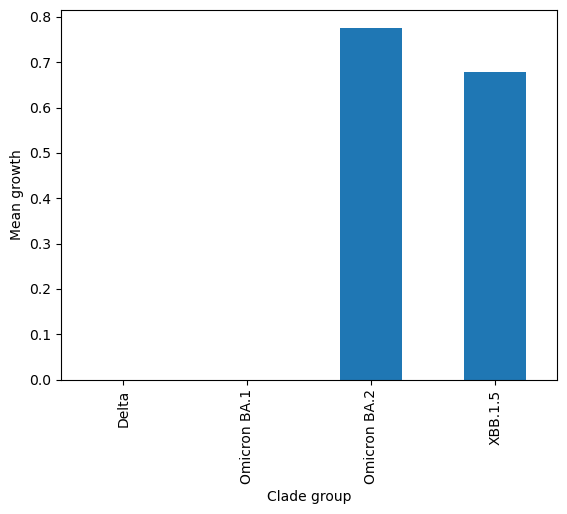

In [16]:
import pandas as pd
growth_summary = pd.DataFrame(summary_rows)
growth_summary

ax = growth_summary.plot(
    x="label", y="growth_mean", kind="bar", yerr=growth_summary["growth_std"], legend=False
)
ax.set_ylabel("Mean growth")
ax.set_xlabel("Clade group")